# 02 Data Exploration

Importing libraries.

In [1]:
import pandas as pd
from matplotlib.colors import LogNorm

Reading file.

In [2]:
data = pd.read_csv('../01_data/clean_data.csv').iloc[:,1:]

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,subject_id,birth_year,age_start_years,age_end_years,shellfish_start,shellfish_end,fish_start,fish_end,milk_start,milk_end,soy_start,soy_end,egg_start,egg_end,wheat_start,wheat_end,peanut_start,peanut_end,sesame_start,sesame_end,nut_start,nut_end,nut_c_s,nut_c_e,allerg_c_s,allerg_c_e,atopic_derm_start,atopic_derm_end,allergic_rhinitis_start,allergic_rhinitis_end,asthma_start,asthma_end,first_asthmarx,last_asthmarx,num_asthmarx
0,1,2006,0.093087,3.164956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,12.232717,18.880219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,0.010951,6.726899,NaN,NaN,NaN,NaN,1.002053,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,2.398357,9.111567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,0.013689,6.193018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 \
 \
Plotting distribution plots for age of detection and allergies.

In [4]:
data_list = [c for c in data.columns if 'start' in c]

In [5]:
%%writefile -a functions.py

import math
import matplotlib.pyplot as plt
import seaborn as sns

def plot_countplot(df, column_list):
    '''Function to plot countplots for categorical dataframe:
    2 columns, n rows (number of columns of dataframe) '''
    
    plt_size = math.ceil(len(column_list)/2)  #define rows in subplot
    n = 0 #counter to attribute position for plot
    
    col_num = []
    row_num = []
    for i1 in [0,1]:
        for i2 in list(range(0,plt_size)):
            col_num.append(i1)
            row_num.append(i2)
    
    fig, ax = plt.subplots(plt_size,2, figsize=(20,40))
    
    #orient = orientation
    
    for i in column_list:
        sns.histplot(data = df, x = i, ax = ax[row_num[n],col_num[n]], color='#a1c9f4')    
        n += 1
                      
    plt.show()

Appending to functions.py


In [6]:
%run functions.py

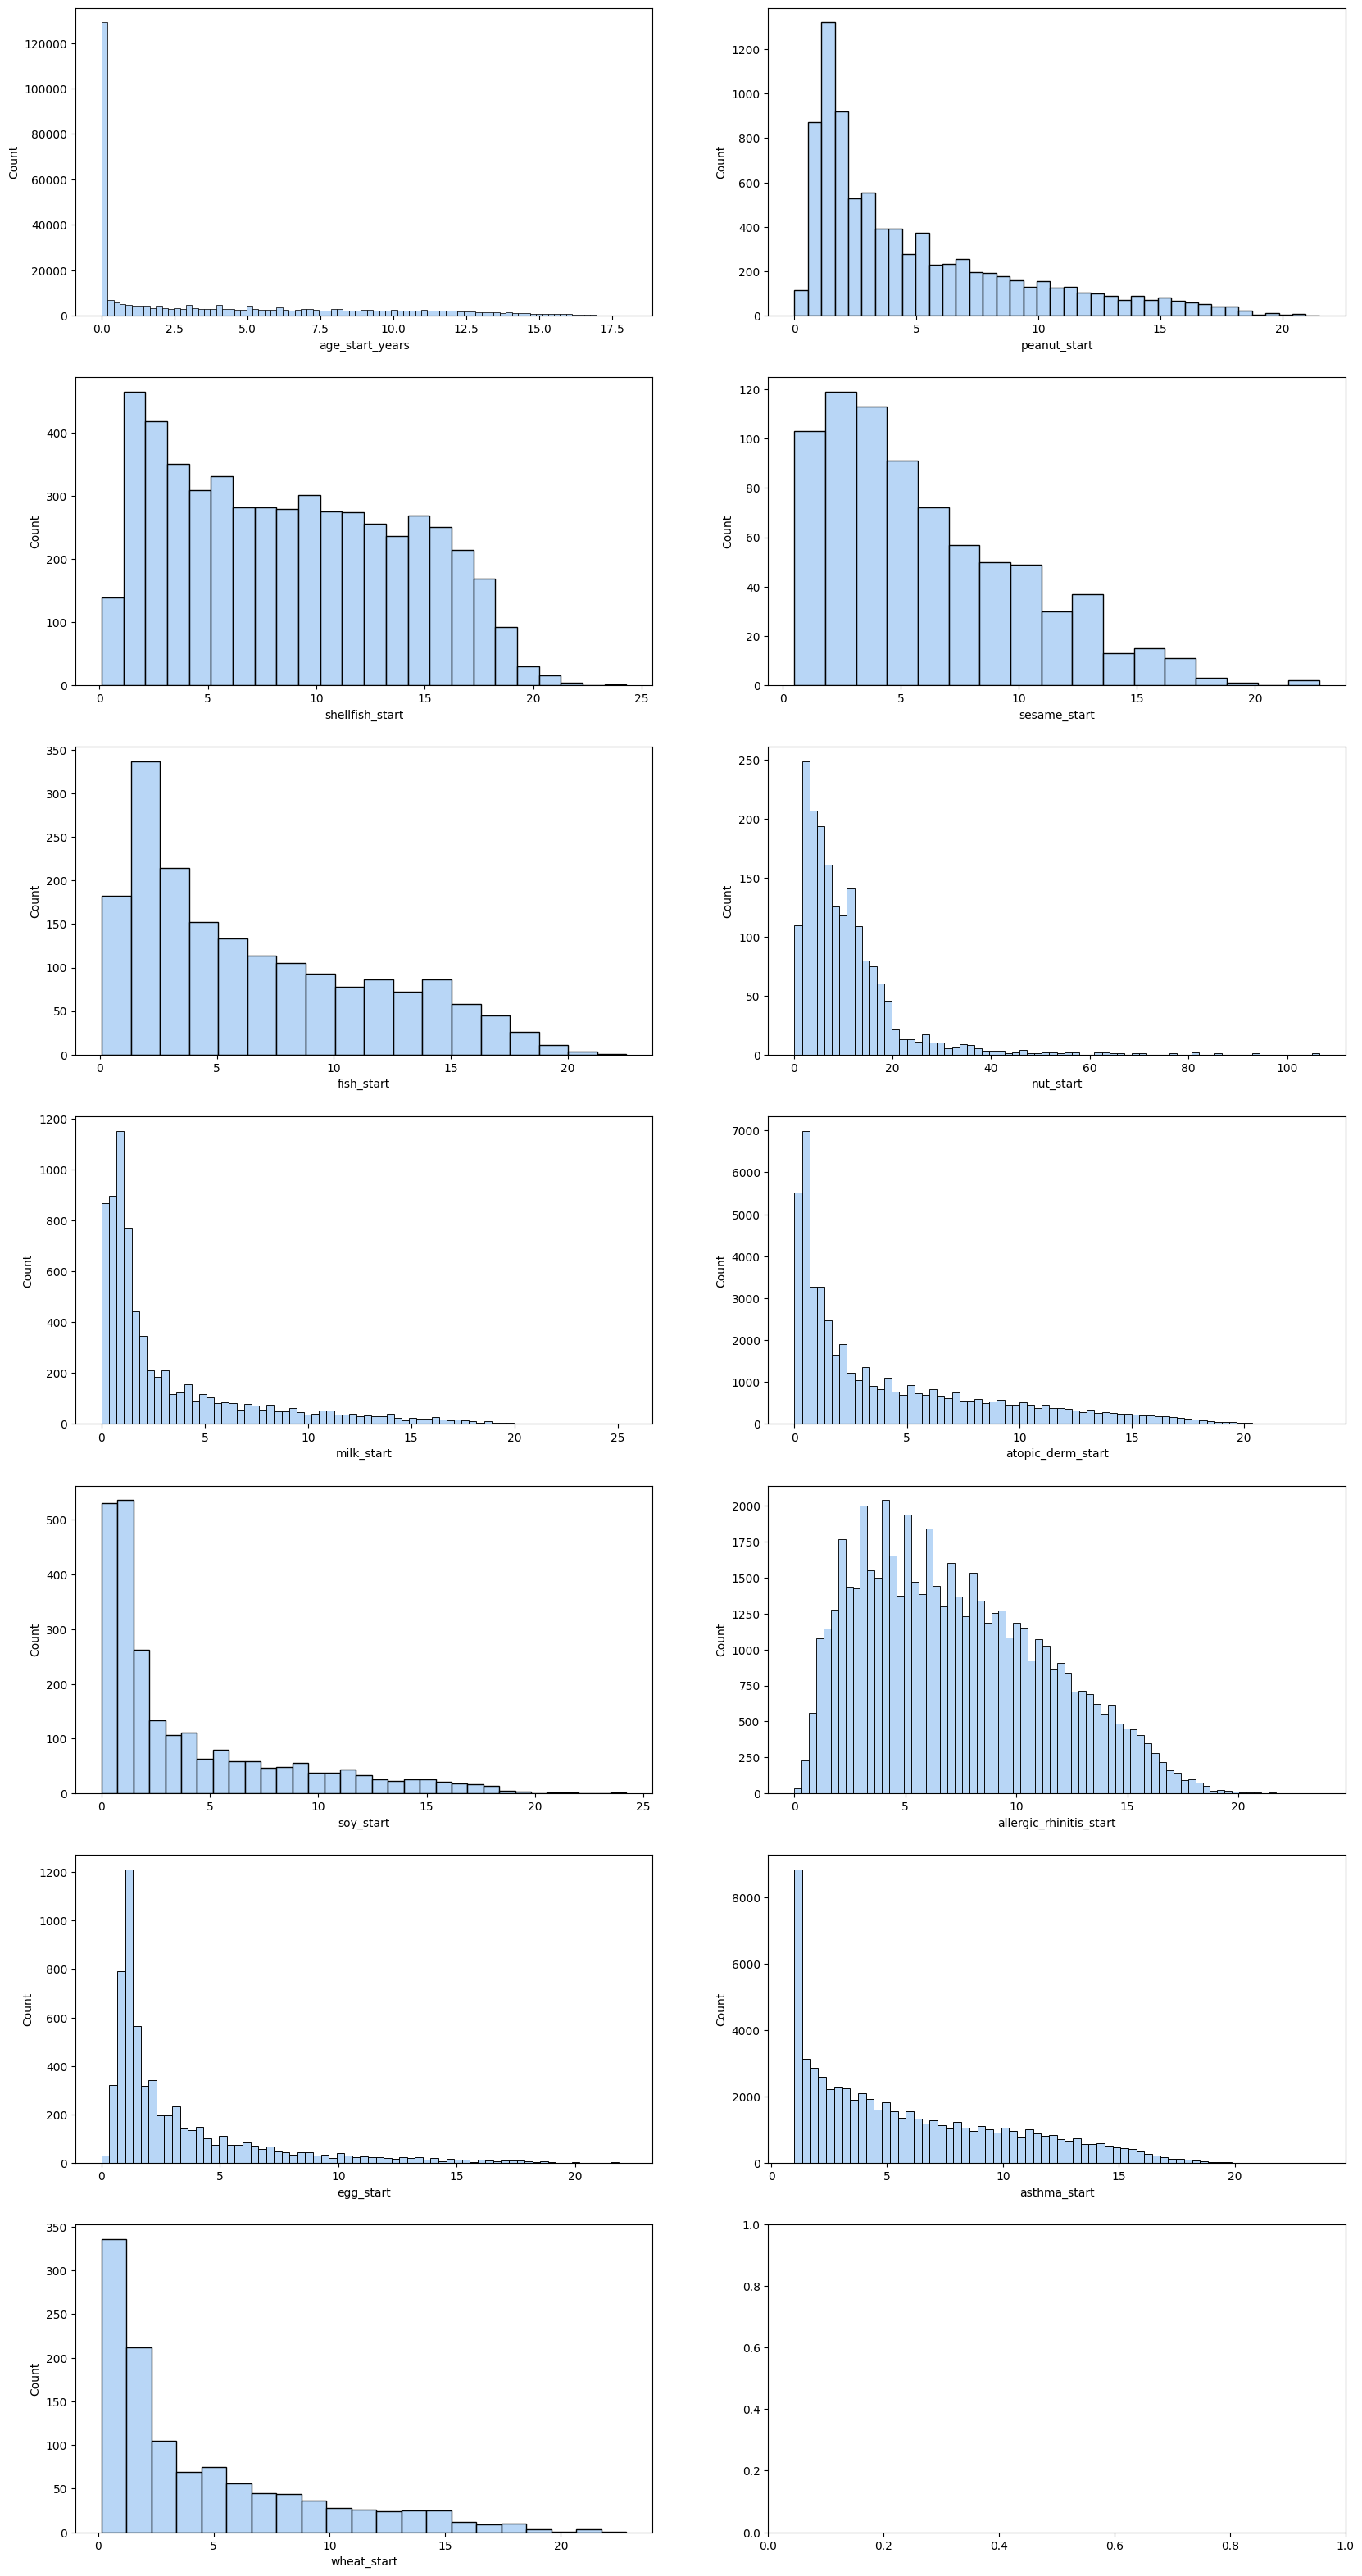

In [7]:
plot_countplot(data, data_list)

Skewed distribution in every plot.\
 \
 \
Plotting number of diagnosis per food allergy.

In [8]:
allerg_list = data_list[1:-3]

In [9]:
allerg_count = data[data[allerg_list]>=0][allerg_list].count()

In [10]:
allerg_count

shellfish_start    5246
fish_start         1796
milk_start         7289
soy_start          2419
egg_start          6064
wheat_start        1145
peanut_start       8652
sesame_start        766
nut_start          1845
dtype: int64

Text(0, 0.5, 'Number of diagnostics')

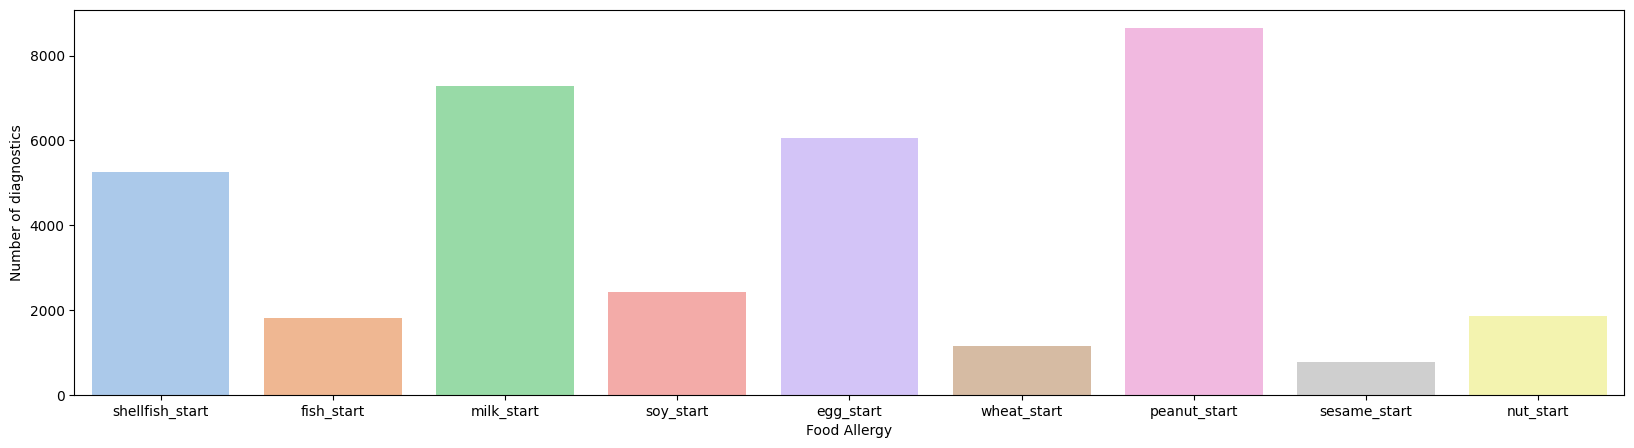

In [11]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x=allerg_list, y=allerg_count, palette='pastel')
ax.set_xlabel('Food Allergy')
ax.set_ylabel('Number of diagnostics')

 \
 \
Plotting age when food allergy was diagnosed, per food allergy.

In [12]:
%%writefile -a functions.py

def plot_age_allergy(df,plot_list):
    '''function to plot age of allergy diagnosis per food allergy '''
    
    fig, ax = plt.subplots(figsize=(10,5))
    
    for d in plot_list:
        a = df[df[d] >= 0]['age_start_years']
        sns.histplot(a, stat='percent', element='poly', fill=False, ax=ax)
    plt.legend(labels= [c.split('_')[0] for c in plot_list])
    plt.show()

Appending to functions.py


In [13]:
%run functions.py

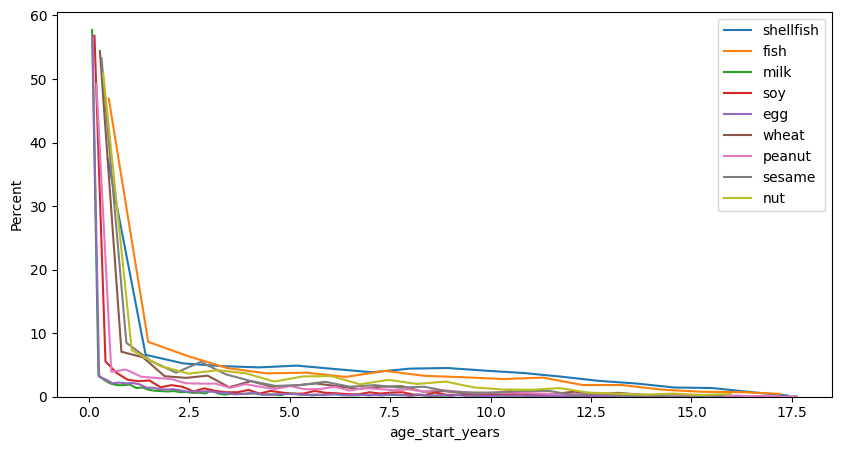

In [14]:
plot_age_allergy(data,allerg_list)

 \
 \
Plotting number of allergies per subject at beginning and end of the follow-up.

Text(0.5, 0, 'Number of allergies at start and end of follow-up')

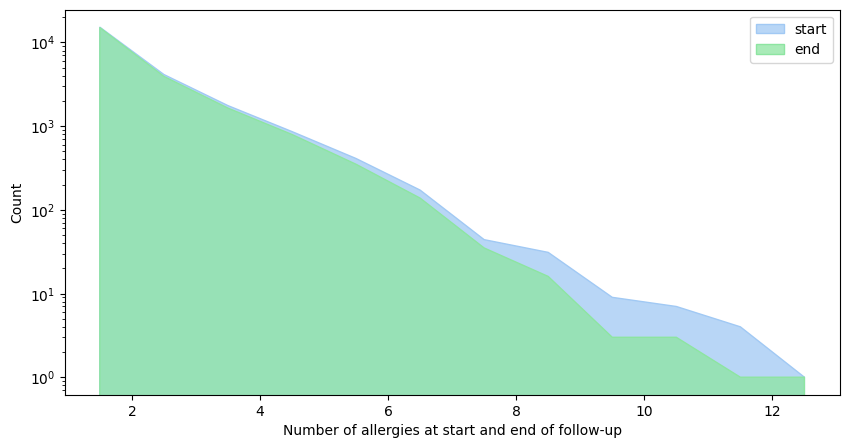

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data[data['allerg_c_s']>0]['allerg_c_s'], element='poly', bins=12, color='#a1c9f4', ax=ax)
sns.histplot(data[data['allerg_c_e']>0]['allerg_c_e'], element='poly', bins=12, color='#8de5a1', ax=ax)
ax.set_yscale('log')
plt.legend(labels= ['start','end'])
ax.set_xlabel('Number of allergies at start and end of follow-up')

 \
 \
Plotting number of allergies per birth year.

In [16]:
allerg_c_s_year = pd.pivot_table(data, values='subject_id', index='birth_year', columns='allerg_c_s', aggfunc='count')

Text(627.9949494949494, 0.5, 'Birth year')

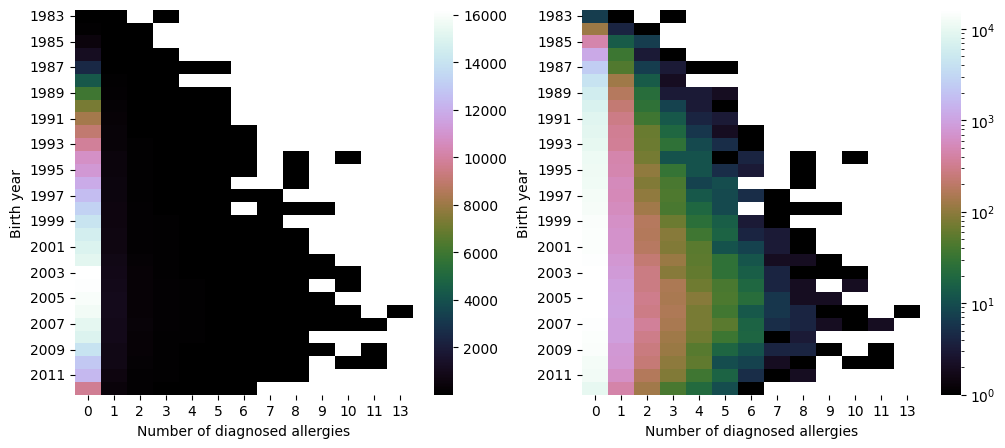

In [17]:
fig,ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(allerg_c_s_year, cmap="cubehelix", ax=ax[0])
sns.heatmap(allerg_c_s_year, norm=LogNorm(), cmap="cubehelix", ax=ax[1])
ax[0].set_xlabel('Number of diagnosed allergies')
ax[1].set_xlabel('Number of diagnosed allergies')
ax[0].set_ylabel('Birth year')
ax[1].set_ylabel('Birth year')

Value = 0 is not represented in these heatmaps

 \
 \
Plotting dermatological and respiratory allergies.

In [18]:
cond_count = data[data[['atopic_derm_start', 'allergic_rhinitis_start', 'asthma_start']]>=0][['atopic_derm_start', 'allergic_rhinitis_start', 'asthma_start']].count()

Text(0, 0.5, 'Number of diagnostics')

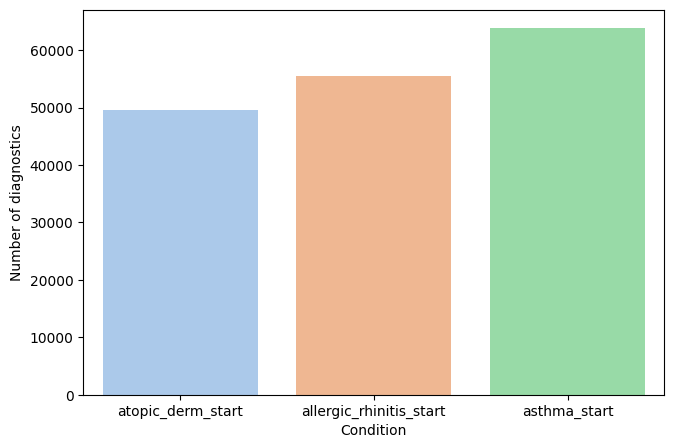

In [19]:
fig, ax = plt.subplots(figsize=(7.5,5))
sns.barplot(x=['atopic_derm_start', 'allergic_rhinitis_start', 'asthma_start'], y=cond_count, palette="pastel")
ax.set_xlabel('Condition')
ax.set_ylabel('Number of diagnostics')